# Event Entry prediction project

In [29]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegressionCV
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

from sklearn.decomposition import PCA


## Data Exploration and Visualization ns.

In [4]:
#Reading the csv file
event_entry = pd.read_csv('Event_entry.csv')
event_entry.head()

,Entry,TicketClass,Sex,Age,Price,Order,Name,Ticket Number,Bank Balance
0,0,3,male,22.0,7,1,"Braund, Mr. Owen Harris",648155,74389
1,1,1,female,38.0,71,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",119239,94932
2,1,3,female,26.0,8,3,"Heikkinen, Miss. Laina",411408,26146
3,1,1,female,35.0,53,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",530093,35627
4,0,3,male,35.0,8,5,"Allen, Mr. William Henry",510583,60457


In [5]:
#looking at the structure of the dataset 
event_entry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Entry          869 non-null    int64  
 1   TicketClass    869 non-null    int64  
 2   Sex            869 non-null    object 
 3   Age            694 non-null    float64
 4   Price          869 non-null    int64  
 5   Order          869 non-null    int64  
 6   Name           869 non-null    object 
 7   Ticket Number  869 non-null    int64  
 8   Bank Balance   869 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 61.2+ KB


In [6]:
#Checking for missing values
event_entry.isna().sum()

Entry              0
TicketClass        0
Sex                0
Age              175
Price              0
Order              0
Name               0
Ticket Number      0
Bank Balance       0
dtype: int64

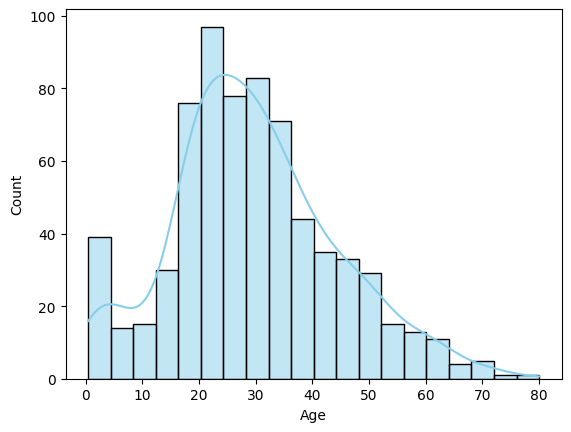

In [7]:
#Ploting a histogram for age
sns.histplot(data=event_entry, x="Age", kde=True, color="skyblue")
plt.show()

The age seems to look somewhat normally distributed. The maximum number of people have their age between 20-30 years.

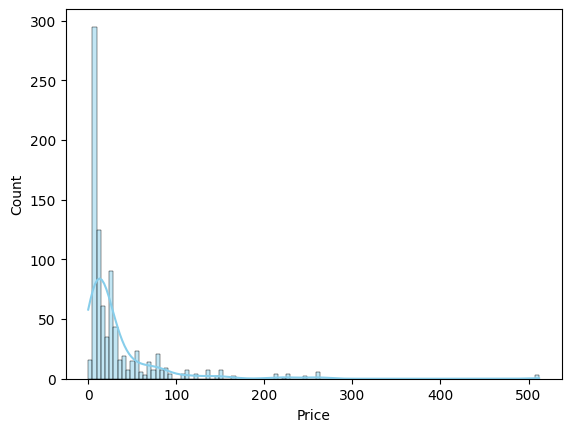

In [8]:
#Plotting histogram for price distribution
sns.histplot(data=event_entry, x="Price", kde=True, color="skyblue")
plt.show()

The price distribution seems to be right skewed.

C:\Users\SANTOSH VIJAYVARGIA\AppData\Local\Temp\ipykernel_9460\2697524527.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="TicketClass", y="Price", data=event_entry, palette="Set2")


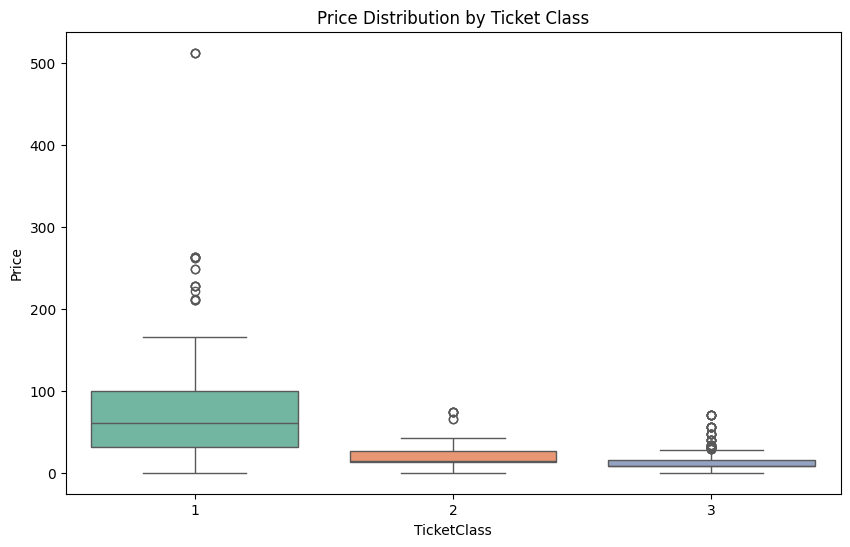

In [10]:
#Plotting price across different ticket classes
plt.figure(figsize=(10, 6))
sns.boxplot(x="TicketClass", y="Price", data=event_entry, palette="Set2")
plt.title("Price Distribution by Ticket Class")
plt.show()

From the above box plot, the data for ticket class 1 seems to be more wide spread and the median price of ticketclass 1 seems to be the highest.

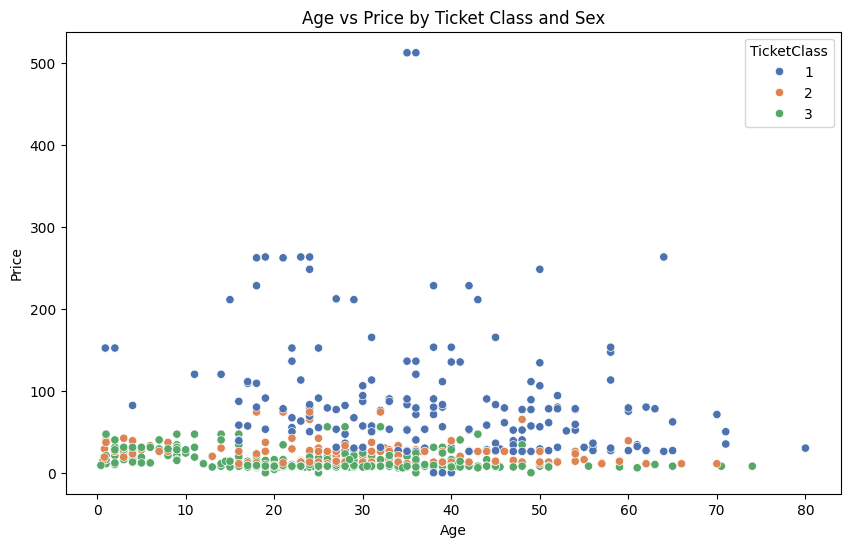

In [11]:
#Scatter plot of Age vs Price for each ticket class
plt.figure(figsize=(10, 6))
sns.scatterplot(data=event_entry, x="Age", y="Price", hue="TicketClass", palette="deep")
plt.title("Age vs Price by Ticket Class and Sex")
plt.show()

From the above chart we can see that ticketclass 1 has the highest prices as compared to other two classes. And ticketclasses are spread across all the age groups similarly.

C:\Users\SANTOSH VIJAYVARGIA\AppData\Local\Temp\ipykernel_9460\1774725699.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
C:\Users\SANTOSH VIJAYVARGIA\AppData\Local\Temp\ipykernel_9460\1774725699.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github

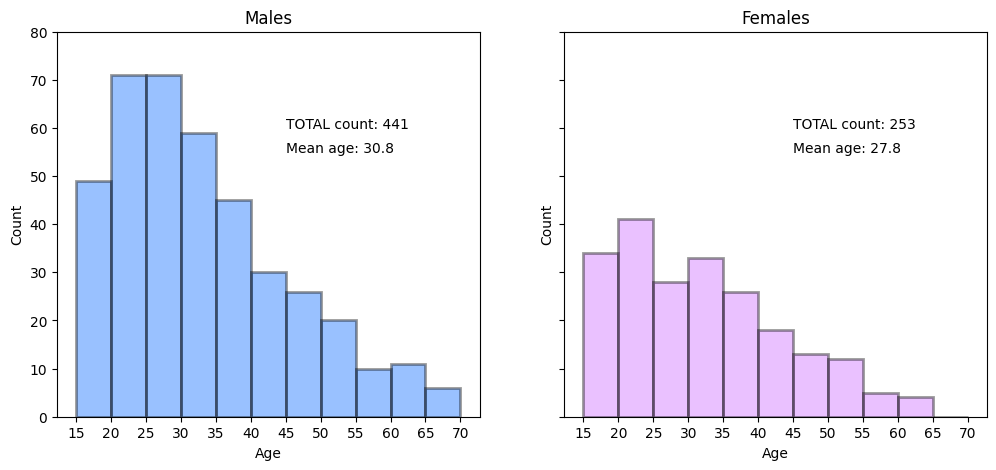

In [12]:
males_age = event_entry[event_entry['Sex']=='male']['Age'] # subset with males age
females_age = event_entry[event_entry['Sex']=='female']['Age'] # subset with females age

age_bins = range(15,75,5)

#males histogram
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.distplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=80)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45,60, "TOTAL count: {}".format(males_age.count()))
ax1.text(45,55, "Mean age: {:.1f}".format(males_age.mean()))

#females histogram
sns.distplot(females_age, bins=age_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45,60, "TOTAL count: {}".format(females_age.count()))
ax2.text(45,55, "Mean age: {:.1f}".format(females_age.mean()))

plt.show()

From the above chart we see that the dataset comprises of more males than females. The age range is similar for both genders. and they seem to be right skewed.

## PCA Analysis  life)

In [13]:
#Imputing missing values of age using the median
age_median = event_entry['Age'].median()
event_entry['Age'].fillna(age_median, inplace = True)
event_entry.isnull().sum()

Entry            0
TicketClass      0
Sex              0
Age              0
Price            0
Order            0
Name             0
Ticket Number    0
Bank Balance     0
dtype: int64

In [18]:
#Dropping Name column
event_df = event_entry.copy()
event_df = event_df.drop(columns = ['Name'])

In [19]:
#Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
event_df['Sex'] = event_df['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [22]:
#Scaling the data
ms = MinMaxScaler()
scaled_data = ms.fit_transform(event_df)
scaled_df = pd.DataFrame(scaled_data, columns=event_df.columns)

scaled_df.head()

,Entry,TicketClass,Sex,Age,Price,Order,Ticket Number,Bank Balance
0,0.0,1.0,1.0,0.271174,0.013672,0.000000,0.647776,0.746993
1,1.0,0.0,0.0,0.472229,0.138672,0.001152,0.118171,0.953580
2,1.0,1.0,0.0,0.321438,0.015625,0.002304,0.410720,0.261846
3,1.0,0.0,0.0,0.434531,0.103516,0.003456,0.529560,0.357190
4,0.0,1.0,1.0,0.434531,0.015625,0.004608,0.510025,0.606889


In [24]:
#Define X and Y variables
X = scaled_df.drop(['Entry'], axis=1)
y = scaled_df['Entry']

# Split and train the model on 80% training
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [27]:
#Log Regression for the original all variables
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

#Predict the test set
y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the Logistic Regression model: {accuracy:.4f}")

Accuracy of the Logistic Regression model: 0.7989


#### PCA with 2,4 and 6 dimensions

In [30]:
#set up PCA and transform xtraina and y train
pca2 = PCA(n_components=2)
X_train_pca2=pca2.fit_transform(X_train)
X_test_pca2=pca2.transform(X_test)

#develop a logistic regression
log_reg_pca2 = LogisticRegression()
log_reg_pca2.fit(X_train_pca2, y_train)

#Predict on the test set
y_pred_pca2 = log_reg_pca2.predict(X_test_pca2)
accuracy_pca2 = accuracy_score(y_test, y_pred_pca2)
print(f"Accuracy of the 2 dimension PCA-Reduced Logistic Regression is: {accuracy_pca2:.4f}")

Accuracy of the 2 dimension PCA-Reduced Logistic Regression is: 0.7874


In [31]:
#set up PCA and transform xtraina and y train
pca4 = PCA(n_components=4)
X_train_pca4=pca4.fit_transform(X_train)
X_test_pca4=pca4.transform(X_test)

#develop a logistic regression
log_reg_pca4 = LogisticRegression()
log_reg_pca4.fit(X_train_pca4, y_train)

#Predict on the test set
y_pred_pca4 = log_reg_pca4.predict(X_test_pca4)
accuracy_pca4 = accuracy_score(y_test, y_pred_pca4)
print(f"Accuracy of the 2 dimension PCA-Reduced Logistic Regression is: {accuracy_pca4:.4f}")

Accuracy of the 2 dimension PCA-Reduced Logistic Regression is: 0.7874


In [32]:
#set up PCA and transform xtraina and y train
pca6 = PCA(n_components=6)
X_train_pca6=pca6.fit_transform(X_train)
X_test_pca6=pca6.transform(X_test)

#develop a logistic regression
log_reg_pca6 = LogisticRegression()
log_reg_pca6.fit(X_train_pca6, y_train)

#Predict on the test set
y_pred_pca6 = log_reg_pca6.predict(X_test_pca6)
accuracy_pca6 = accuracy_score(y_test, y_pred_pca6)
print(f"Accuracy of the 2 dimension PCA-Reduced Logistic Regression is: {accuracy_pca6:.4f}")

Accuracy of the 2 dimension PCA-Reduced Logistic Regression is: 0.8046


The logistic regression model with all variables had an accuracy of 0.7989 which is higher than PCA 2 and 4 reduced regression model. PCA2 and 4 reduced regression model have an accuracy of 0.7874 which is slightly lower than the accuracy for the logictic regression model with all variables. PCA 6 reduced logistic model has an accuracy of 0.8046 which is the highest.

In [33]:
#Lasso model with cross-validation
lasso_model = LogisticRegressionCV(penalty='l1', solver='liblinear', cv=5)

#Training the lasso model
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

accuracy_lasso = accuracy_score(y_test, y_pred_lasso)

print(f"Accuracy of the Lasso Logistic Regression: {accuracy_lasso:.4f}")

Accuracy of the Lasso Logistic Regression: 0.7989


The lasso logistic regression model has an accuracy of 0.7989 which is same as the accuracy of the logistic regression model with all the variables. This seems to be less than PCA 6 reduced logistic model's accuracy.

## Decision Tree Analysists.

In [34]:
#Defining X and Y variables
#We drop the variables: name, Order, Ticket Number and bank balance from this model because these are insignificant variables in 
#Classifying if a person is entered or not
X = event_entry[['TicketClass','Sex','Age','Price']]
Y = event_entry['Entry']

#Split the datset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=40)

#Converting categorical variables into binary
X_train_encoded = pd.get_dummies(X_train, columns=['TicketClass','Sex'], drop_first = True)
X_test_encoded = pd.get_dummies(X_test, columns=['TicketClass','Sex'], drop_first = True)


Accuracy: 0.7816091954022989
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       109
           1       0.71      0.69      0.70        65

    accuracy                           0.78       174
   macro avg       0.77      0.76      0.77       174
weighted avg       0.78      0.78      0.78       174

R2 score: 0.06676076217360627


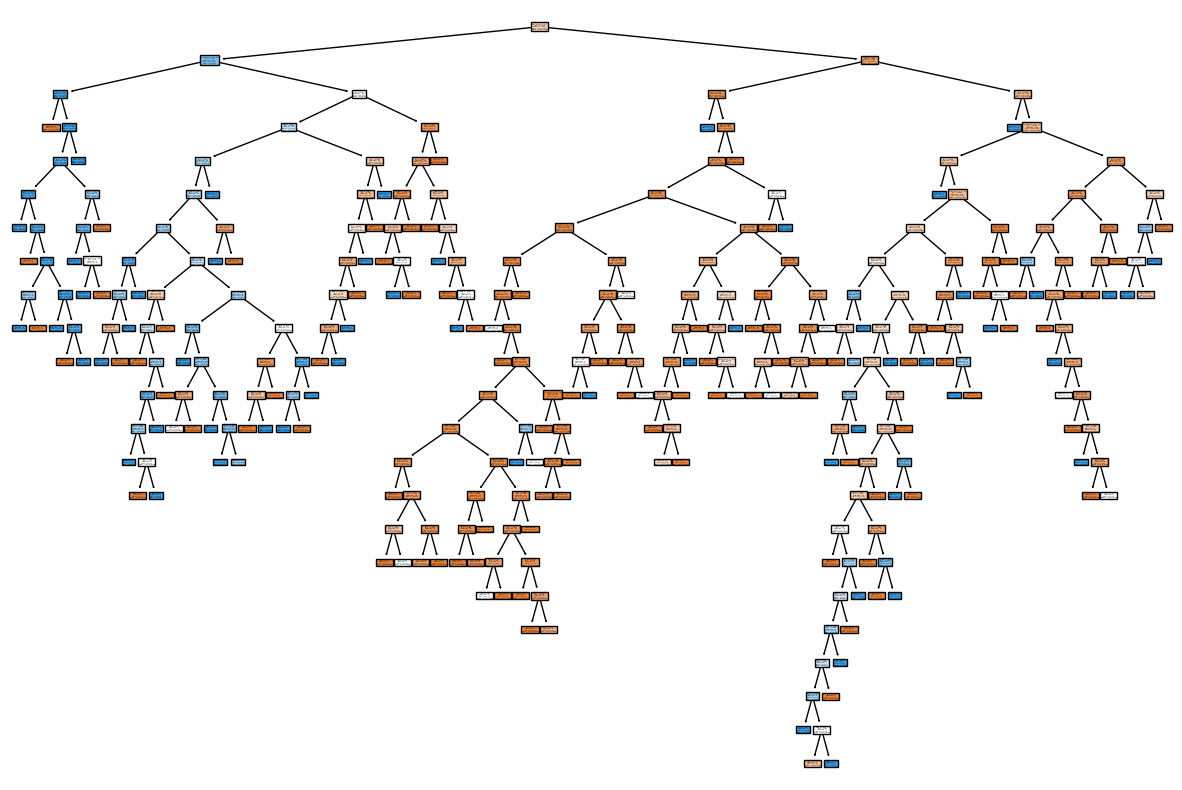

In [35]:
#Training the decission tree model
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train_encoded, y_train)

#Predicting the y values on test data
y_pred = model.predict(X_test_encoded)

#Calculating accuracy of the model
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy:', accuracy)

#Calculating and pritning the confusion matrix
print(classification_report(y_test, y_pred))

#Calculating R2 score
r2 = r2_score(y_test, y_pred)
print('R2 score:',r2)

#Trying out a cool plot
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=X_train_encoded.columns, class_names=['Not Entered', 'Entered'])
plt.show()

The above model generates an accuracy of 0.781 ie the classifier correctly predicted the entry status for approx 78.2% of the instances in the test set. The precision of 0.82 for class 0 (Denied) indicate that out of 100 records the classifier predicts correct denied entry 82 times and the precision of 0.71 for class 1(Entered) indicate that out of 100 records the classifier predicts correct entry 71 times. Overall the results indicate that the classifier has decent perfromance in classifieng as entered or not entered.

## K Means Clusteringrs.
 

In [46]:
#Dropping other columns only keeping Age and Price
event_entry_k = event_entry[['Age','Price']]

#Scaling the values in the dataset for standardization
event_entry_k = (event_entry_k - event_entry_k.mean()) / event_entry_k.std()
event_entry_k.head()

,Age,Price
0,-0.565194,-0.510001
1,0.659595,0.765253
2,-0.258997,-0.490075
3,0.429947,0.406588
4,0.429947,-0.490075


In [59]:
# List to store the KMeans models for each number of clusters
kmeans_models = []

# Loop over the range of cluster numbers and fit the KMeans model
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(event_entry_k)
    kmeans_models.append(kmeans)

print(kmeans_models)

C:\Users\SANTOSH VIJAYVARGIA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SANTOSH VIJAYVARGIA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SANTOSH VIJAYVARGIA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SANTOSH VIJAYVARGIA\AppData\Local\

[KMeans(n_clusters=1, random_state=42), KMeans(n_clusters=2, random_state=42), KMeans(n_clusters=3, random_state=42), KMeans(n_clusters=4, random_state=42), KMeans(n_clusters=5, random_state=42), KMeans(n_clusters=6, random_state=42), KMeans(n_clusters=7, random_state=42), KMeans(random_state=42), KMeans(n_clusters=9, random_state=42), KMeans(n_clusters=10, random_state=42)]


C:\Users\SANTOSH VIJAYVARGIA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SANTOSH VIJAYVARGIA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


C:\Users\SANTOSH VIJAYVARGIA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SANTOSH VIJAYVARGIA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SANTOSH VIJAYVARGIA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SANTOSH VIJAYVARGIA\AppData\Local\

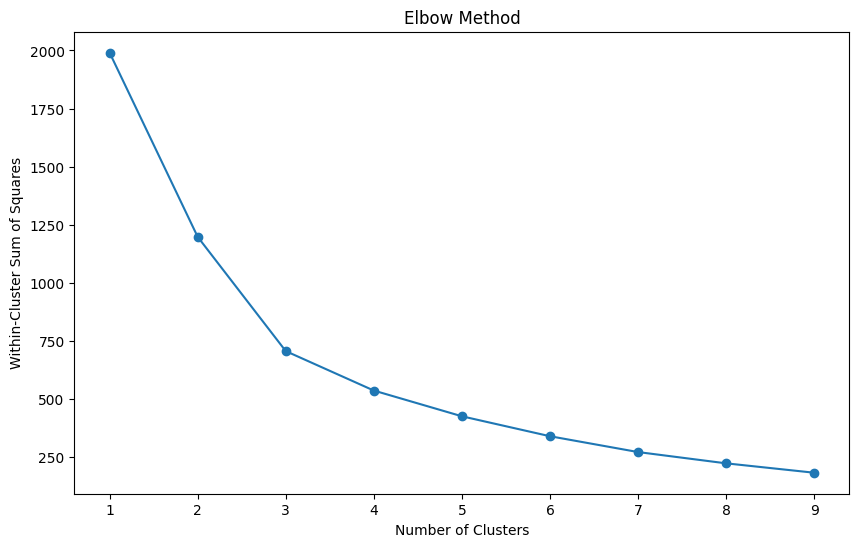

In [61]:
# Elbow rule
deviances = [KMeans(n_clusters=k).fit(event_entry_k).inertia_ for k in range(1, 10)]

# Plot the deviances
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), deviances, marker='o', linestyle='-')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares")
plt.show()


From the above elbow plot, I observe that the within cluster sum of squares decreases for k above 5. Therefore, I choose the optimal value of k is k = 5
In the above plot the rate of decrease in WCSS slows down after k=5. This suggests that adding more than 5 clusters does not lead to a significant decrease in WCSS.

In [62]:
#Performing k means clustering for k = 5
# Applying KMeans clustering with 5 centers
kmeans_model = KMeans(n_clusters=5, random_state=42)
event_clusters = kmeans_model.fit(event_entry_k)

# Assigning the cluster labels to the data
event_entry_k['Cluster'] = event_clusters.labels_

# Displaying Cluster Sizes
print("Cluster sizes:")
print(event_entry_k['Cluster'].value_counts())

# Displaying Cluster Means:
print("\nCluster means:")
print(event_entry_k.groupby('Cluster').mean())

# Displaying Clustering vector:
print("\nClustering vector:")
print(event_entry_k['Cluster'])

# Within cluster sum of squares by cluster:
print("\nWithin cluster sum of squares by cluster:")
print(kmeans_model.inertia_)

# Proportion of variance explained:
total_variance = event_entry_k[['Age', 'Price']].var().sum() * (len(event_entry_k) - 1)
between_cluster_variance = total_variance - kmeans_model.inertia_
print(f"\n(between_SS / total_SS = {100 * between_cluster_variance / total_variance:.1f} %)")


Cluster sizes:
Cluster
4    481
2    190
1    158
0     37
3      3
Name: count, dtype: int64

Cluster means:
              Age     Price
Cluster                    
0        0.198065  3.081498
1       -1.319665 -0.120186
2        1.390642  0.012266
3        0.455464  9.552551
4       -0.133908 -0.261984

Clustering vector:
0      4
1      2
2      4
3      2
4      4
      ..
864    4
865    2
866    4
867    4
868    4
Name: Cluster, Length: 869, dtype: int32

Within cluster sum of squares by cluster:
426.61126594136385

(between_SS / total_SS = 75.4 %)


C:\Users\SANTOSH VIJAYVARGIA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


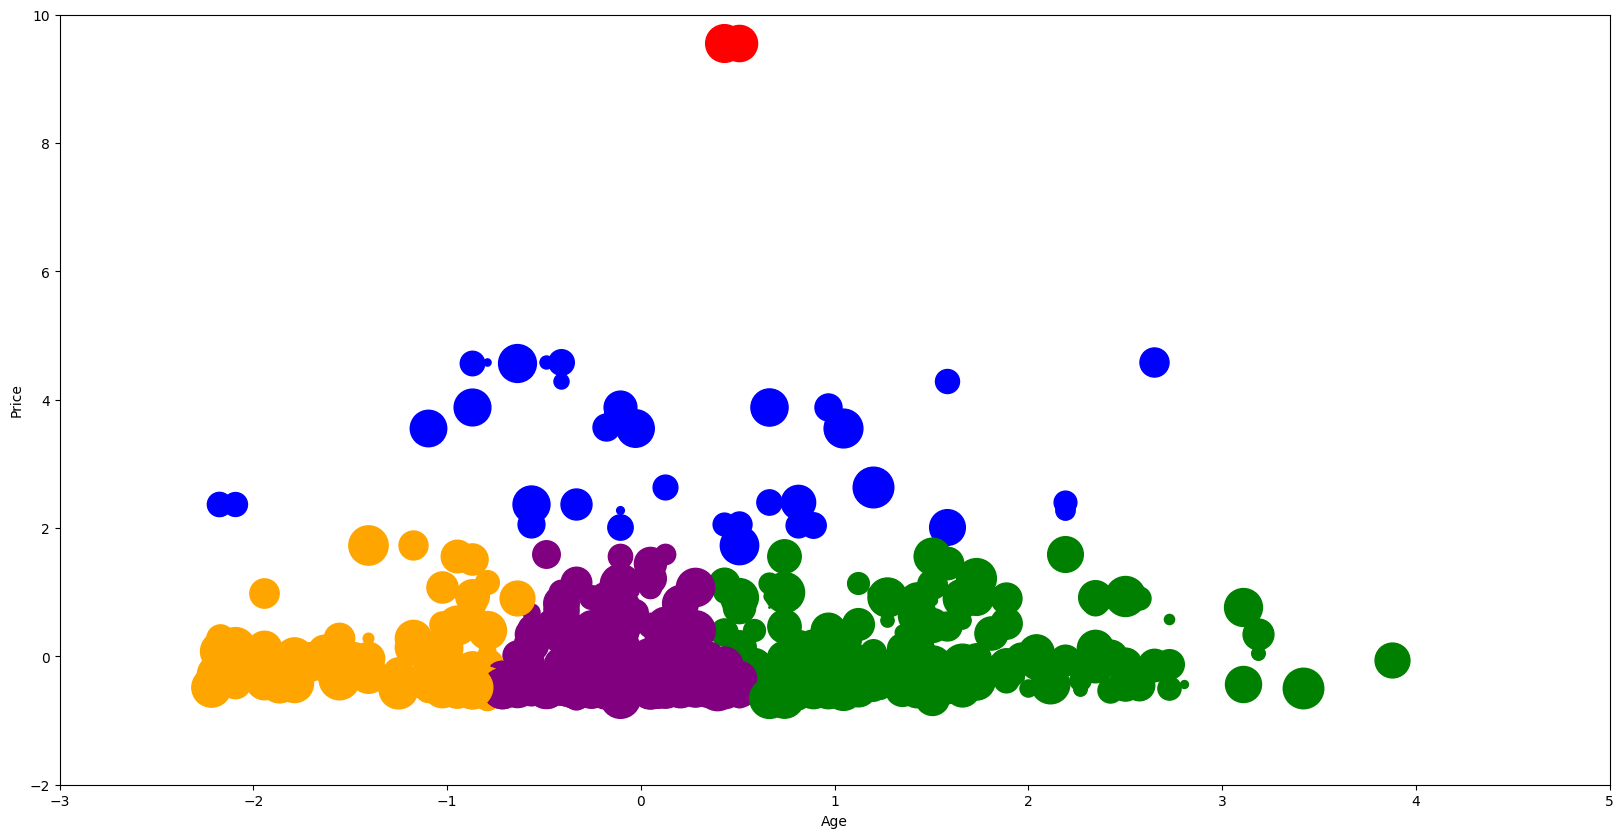

In [80]:
#Plotting the graph to show the new clusters
#Create the scatter plot
plt.figure(figsize=(20, 10))
plt.scatter(event_entry_k["Age"], event_entry_k["Price"], c='white')  # Invisible points, just for the axis limits
plt.xlim(-3, 5)
plt.ylim(-2, 10)
plt.xlabel("Age")
plt.ylabel("Price")

# Ensure cluster labels are integers and are in the range [0, 4]
event_entry_k['Cluster'] = event_entry_k['Cluster'].astype(int)

# Manually define a list of 5 distinct colors
colors = ["blue", "orange", "green", "red", "purple"]

for idx, row in event_entry_k.iterrows():
    plt.scatter(row["Age"], row["Price"], idx, color=colors[int(row['Cluster'])])

plt.show()
